# Θεωρία Πληροφορίας
### Σειρά 3
*Edited by : Κωνσταντίνος Τσαούσης 03117652*

Η παρακάτω εργασία περιέχει τον κώδικα που χρησιμοποίησα για την επίλυση της τρίτης σειράς ασκήσεων  για το μάθημα της Θεωρίας Πληροφορίας 9ου εξαμήνου, μαζί με τα σχόλια και τα αποτελέσματα. 

# Κώδικας που έγραψα για τον υπολογισμό της Εντροπίας, KL divergence και του ρυθμού Εντροπίας (Entropy rate) 

In [ ]:
import numpy as np
from scipy.special import comb

def Entropy(probs):
  entropy = 0
  for i in range(len(probs)):
      if probs[i] != 0:
          entropy -= probs[i] * np.log2(probs[i])
  return round(entropy,3)

def KL_distance(Pprobs,Qprobs):
  distance = 0
  if 0 in Qprobs:
      return float('inf')
  for i in range(len(Pprobs)):
      if Pprobs[i] != 0:
          distance += Pprobs[i] * np.log2(Pprobs[i] / Qprobs[i])
  return round(distance,3)

def Entropy_rate(probs, stationary_dist):
    rate = 0
    for i in range(len(probs)):
        for j in range(len(probs[i])):
            if probs[i] != 0:
                rate -= stationary_dist[i] * probs[i][j] * np.log2(probs[i][j])
    return round(rate,3)

# Άσκηση 1 


### 1)

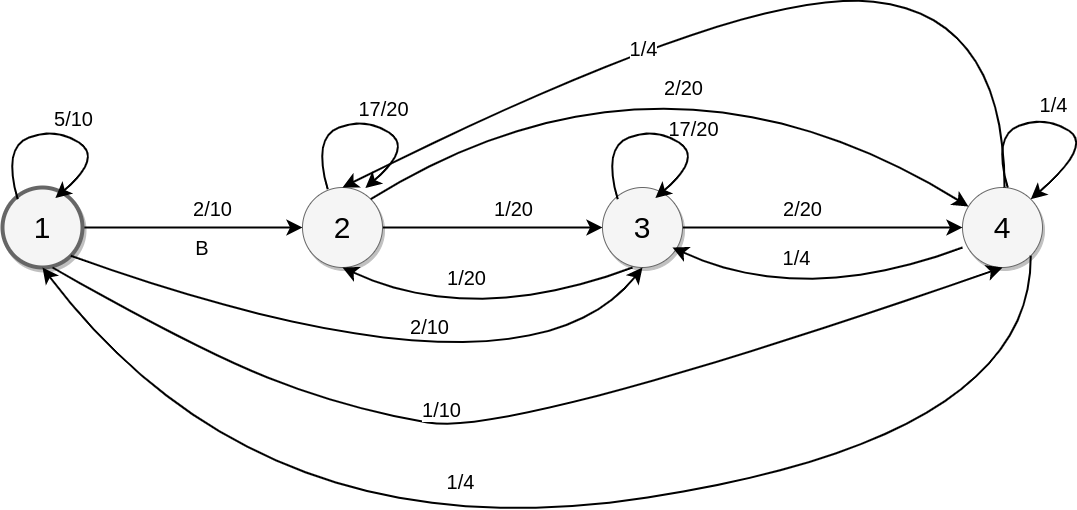

### 2)


Από τον τύπο της στάσιμης κατανομής, προκύπτουν οι παρακάτω εξισώσεις των m1,2,3,4.

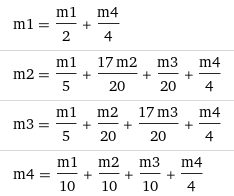

Δεν είναι όμως γραμμικά ανεξάρτητες
και μέσω αυτών δεν μπορεί να βρεθεί μοναδική λύση, αλλά φτάνουν στο παρακάτω τερματικό σημείο:
image.png

Για το σκοπό αυτόν θα χρησιμοποιήσουμε την την επι πλέον συνθήκη κανονικοποίησης, m1+m2+m3+m4=1. Έτσι θα προκύψει m1= 1/17, m2= 7/17, m3=7/17, m4=2/17 οι όροι της στάσιμης κατανομής

Σε δεκαδική μορφή (γιατί θα χρειαστεί αργότερα) έχουμε

*   m1= 0,058823529
*   m2= 0,411764706
*   m3= 0,411764706
*   m4= 0,117





### 3)

In [ ]:
stationary = [1/17,7/17,7/17,2/17]
print("Entropy = ",Entropy(stationary))



Entropy =  1.658


### 4)

Απο τον τύπο και χρησιμοποιώντας τις πιθανότητες έχουμε:

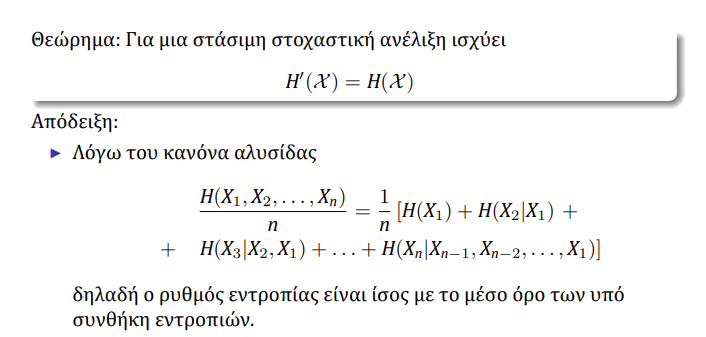

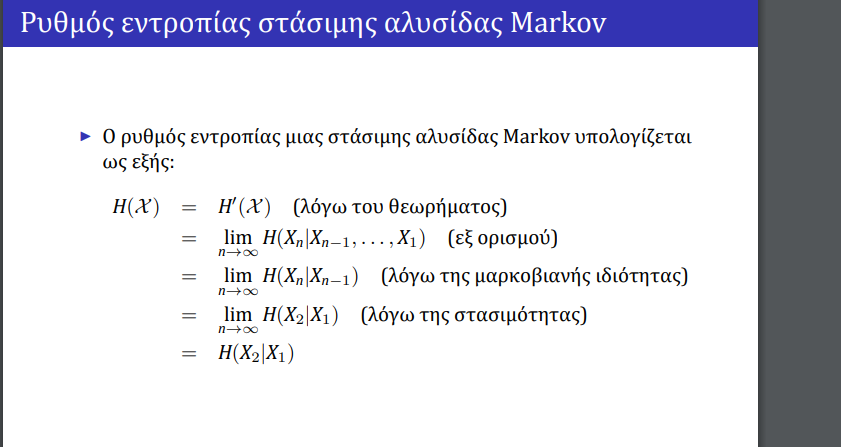

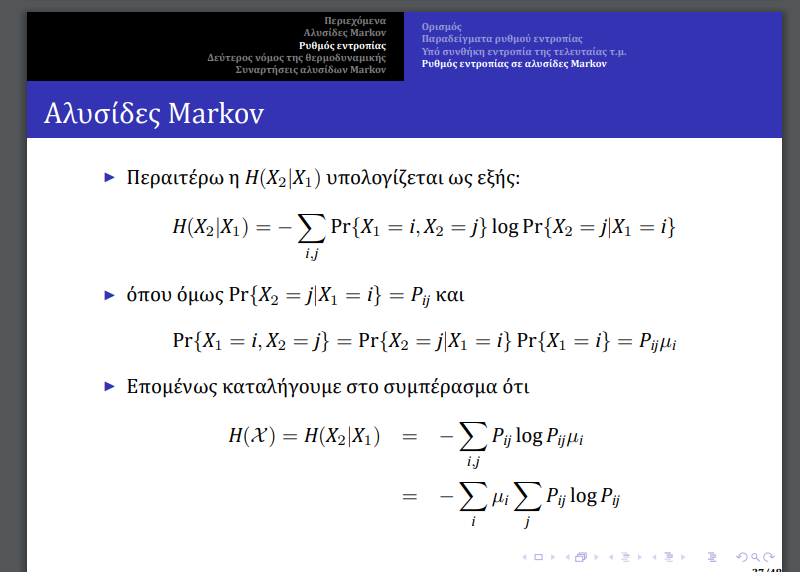

In [ ]:
probs = [[5/10,2/10,2/10,1/10],[17/20,1/20,2/20],[1/20,17/20,2/20],[1/4,1/4,1/4,1/4]]
print("Entropy rate = ",Entropy_rate(probs, stationary))

Entropy rate =  0.955


# Άσκηση 2

### 1)

Τα m απο την προηγούμενη άσκηση είναι :
*   m1= 0,058823529
*   m2= 0,411764706
*   m3= 0,411764706
*   m4= 0,117647059

Υπολογίζωντας τις πιθανότητες 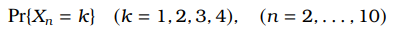 και σχεδιάζοντας το διάγραμμα, προκύπτουν δύο παρατηρήσεις:



1.   Όσο το n αυξάνεται, οι πιθανότητες συγκλίνουν/προσεγγίζουν όλο και περισσότερο τις τιμές των m που βρήκαμε στο ερώτημα 2 της πρώτης άσκησης . Αυτό είναι λογικό και αναμενόμενο από την θεωρία, αλλά και απο τον νόμο των μεγάλων αριθμών
2.  Οι m2,m3 έχουν την ίδια τιμή εντροπίας (εφόσον στην εντροπία δε μας ενδιαφέρει η σειρά των πιθανοτήτων, λογικό) και συγκλίνουν με τον ίδιο τρόπο με το n, πράγμα που σημαίνει ότι η μία πέφτει πάνω στην άλλη (ανοιχτό πράσινο σχέδιο= πράσινο και κίτρινο)




[0.25 0.25 0.25 0.25]
[0.1875 0.3375 0.3375 0.1375]
[0.128125 0.375625 0.375625 0.120625]
[0.09421875 0.39384375 0.39384375 0.11809375]
[0.07663281 0.40282656 0.40282656 0.11771406]
[0.06774492 0.40729898 0.40729898 0.11765711]
[0.06328674 0.40953235 0.40953235 0.11764857]
[0.06105551 0.4106486  0.4106486  0.11764728]
[0.05993958 0.41120667 0.41120667 0.11764709]
[0.05938156 0.41148569 0.41148569 0.11764706]
11 11


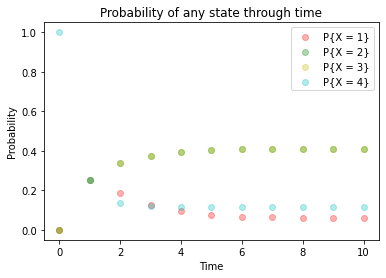

In [ ]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt


state = np.array([0,0,0,1])
probs = np.array([[5/10,2/10,2/10,1/10],[0,17/20,1/20,2/20],[0,1/20,17/20,2/20],[1/4,1/4,1/4,1/4]])
x, y, z, w = [0], [0], [0] , [1]
for i in range(10):
    state = np.dot(state,probs)
    print(state)
    x.append(state[0])
    y.append(state[1])
    z.append(state[2])
    w.append(state[3])
time = np.linspace(0,10,11)
print(len(x),len(time))
plt.scatter(time,x,c = 'r',alpha = .3,label = 'P{X = 1}')
plt.scatter(time,y,c = 'g',alpha = .3,label = 'P{X = 2}')
plt.scatter(time,z,c = 'y',alpha = .3,label = 'P{X = 3}')
plt.scatter(time,w,c = 'c',alpha = .3,label = 'P{X = 4}')
plt.title('Probability of any state through time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

# 2)

Η τιμή της εντροπίας αρχικά ανεβαίνει, έπειτα πέφτει, και τέλος συγκλίνει, περίπου στο 1.658, δηλαδή στην τιμή που βρήμα στην πρώτη άσκηση χρησιμοποιώντας τα m δηλαδή την στάσιμη κατανομή, πράγμα αναμενόμενο . Όπως φαίνεται και στην επόμενη διαφάνεια, όσο αυξάνεται το ν οποιαδήποτε κατανομή πλησιάζει βαθμιαία τη στάσιμη, και συγκλίνει σε αυτή.(δηλαδή η σχετική εντροπία ως προς την στάσιμη κατανομή τείνει στο 0)

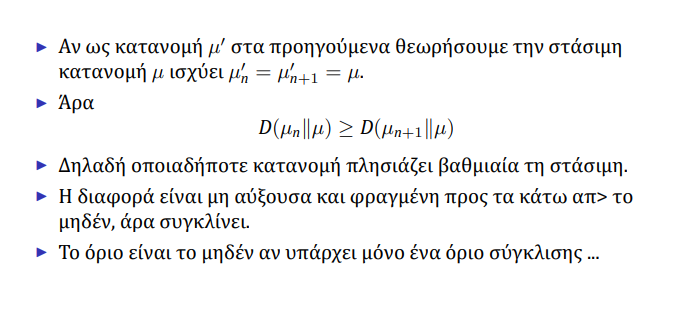

2.0
1.904
1.809
1.744
1.704
1.682
1.67
1.664
1.661
1.659


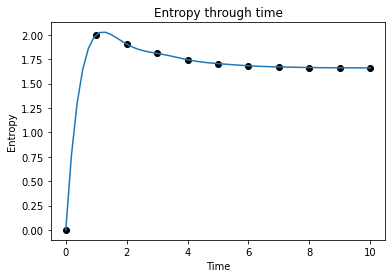

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

Entropy_time = [Entropy([0,0,0,1])]
for i in range(1,11):
    Entropy_time.append(Entropy([x[i],y[i],z[i],w[i]]))
    print(Entropy([x[i],y[i],z[i], w[i]]))
xnew = np.linspace(0, 11 - 1, 5 * 11)
spl = make_interp_spline(time, Entropy_time, k=5)
Entropy_time_smooth = spl(xnew)

plt.plot(xnew, Entropy_time_smooth, label='Spline')

plt.scatter(time,Entropy_time,c = 'black')
plt.title("Entropy through time")
plt.xlabel('Time')
plt.ylabel('Entropy')
 
plt.show()

### 3)
Χρησιμοποιώντας αυτόν τον τύπο έχουμε 
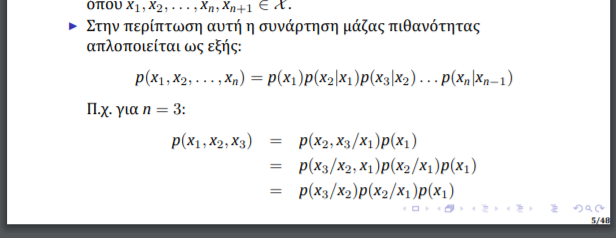

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

rate = [Entropy([0,0,0,1])]
for i in range(1,6):
    rate.append( i / (i + 1) * Entropy([x[i],y[i],z[i],w[i]]) * rate[i-1])
    print('Entropy',i,"=",round(i / (i + 1) * Entropy([x[i],y[i],z[i],w[i]]) * rate[i-1]),3)

print(len(rate))
xnew = np.linspace(0, 11 - 1, 5 * 11)
spl = make_interp_spline(time, rate, k=5)
rate_smooth = spl(xnew)

plt.plot(xnew, [rate_smooth], label='Spline')

plt.scatter(time,rate,c = 'black')
plt.title("Entropy rate through time")
plt.xlabel('Time')
plt.ylabel('Entropy rate')
plt.show()






Entropy  1 = 0.0
Entropy  2 = 2.0
Entropy  3 = 3.314
Entropy  4 = 4.424
Entropy  5 = 5.452
Entropy  6 = 6.443
